In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

red = '#e41a1c'
blue = '#377eb8'
green = '#4daf4a'
purple = '#984ea3'
orange = '#ff7f00'

%run paper/setup.py

In [2]:
df = pd.read_csv('../../Dropbox (Sydney Uni)/Shared/pulsator_fraction/all_stars_with_gaia_mathur_green.csv')

In [3]:
puls = df[df['pulsating']==1]

In [4]:
puls['snrmed'].max()

1875.038162

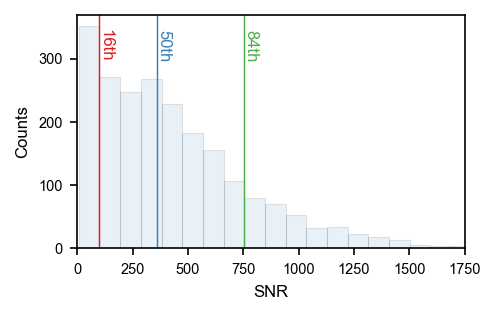

In [63]:
plt.figure(figsize=mnras_size(240.))

plt.hist(puls['snrmed'], bins=20, alpha=0.1, linewidth=0.5, edgecolor='black')
#          alpha=0.2, color='k');
# n, bins, patches = plt.hist(puls['snrmed'], bins=20, histtype='step', linewidth=2, cumulative=True)


percs = np.percentile(puls['snrmed'], [15.87, 50, 84.13])
for perc, val, color in zip(percs, ['16th', '50th', '84th'], [red, blue,green]):
    plt.axvline(perc, c=color, linewidth=0.7)
    plt.text(perc, 300, val, rotation=-90, c=color)
    
# plt.axvline(50, c=red)
# plt.axvline(500, c=green)
# plt.axvline(1000, c=blue)

plt.xlabel('SNR')
plt.ylabel('Counts')
plt.xlim(0,1750)

plt.savefig(overleaf_path + 'snr_dist.pdf', 
            dpi=300, bbox_inches='tight', pad_inches=0)
# plt.savefig('dsct_snr_dist.png', dpi=300, bbox_inches='tight')

In [61]:
np.exp(-1.0048 * np.log(percs) + 6.6173)

array([7.94312885, 2.02900574, 0.96680069])

Text(0, 0.5, 'Counts')

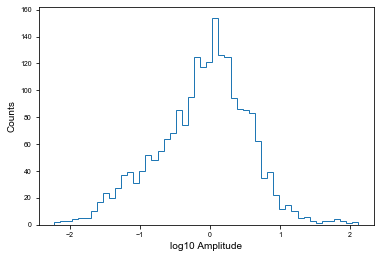

In [35]:
plt.hist(np.log10(df[df['pulsating']==1]['amp'] * 0.835), bins=50, histtype='step')
plt.xlabel('log10 Amplitude')
plt.ylabel('Counts')
# plt.savefig('amplitude.png', dpi=300)

In [12]:
import lightkurve as lk

lc = lk.search_lightcurvefile('TIC 260353074', mission='TESS').download_all().stitch().remove_nans()

/Users/danielhey/Dropbox (Sydney Uni)/code/lightkurve/lightkurve/collections.py:212: LightkurveWarning: Stitching a `LightCurveFileCollection` which contains both SAP and PDCSAP_FLUX. Plotting PDCSAP_FLUX. You can remove this warning by using `LightCurveFileCollection.PDCSAP_FLUX.stitch()`.
  LightkurveWarning)


In [50]:
lc_files = lk.search_lightcurvefile('TIC 260353074', mission='TESS')#.download_all().stitch().remove_nans()

In [53]:
lc_files

SearchResult containing 12 data products.

target_name                     productFilename                     description  distance
----------- ------------------------------------------------------- ------------ --------
  260353074 tess2018234235059-s0002-0000000260353074-0121-s_lc.fits Light curves      0.0
  260353074 tess2018263035959-s0003-0000000260353074-0123-s_lc.fits Light curves      0.0
  260353074 tess2018292075959-s0004-0000000260353074-0124-s_lc.fits Light curves      0.0
  260353074 tess2018319095959-s0005-0000000260353074-0125-s_lc.fits Light curves      0.0
  260353074 tess2018349182459-s0006-0000000260353074-0126-s_lc.fits Light curves      0.0
  260353074 tess2019006130736-s0007-0000000260353074-0131-s_lc.fits Light curves      0.0
  260353074 tess2019032160000-s0008-0000000260353074-0136-s_lc.fits Light curves      0.0
  260353074 tess2019058134432-s0009-0000000260353074-0139-s_lc.fits Light curves      0.0
  260353074 tess2019085135100-s0010-0000000260353074-0140

In [20]:
pg = lc.to_periodogram(minimum_frequency=50)

/Users/danielhey/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/danielhey/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


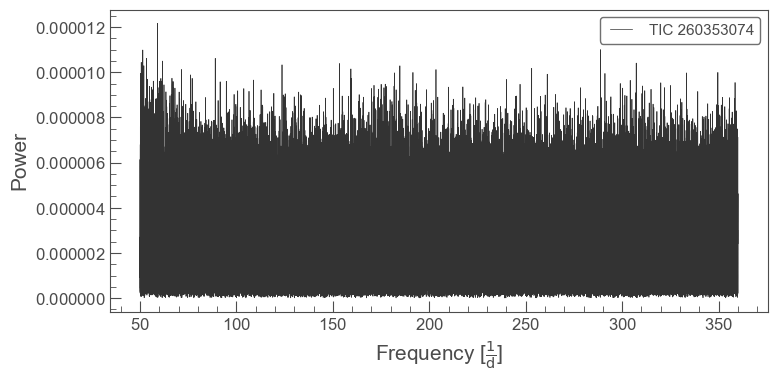

In [23]:
pg.plot()

In [36]:
lc = lk.search_lightcurvefile('TIC 260353074', mission='TESS').download_all().stitch().remove_nans()

2.790782101466884e-06

Text(0, 0.5, 'Counts')

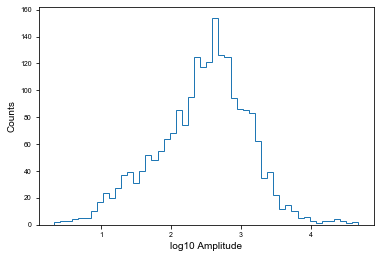

In [49]:
vals = (df[df['pulsating']==1]['amp'] * 0.835 * 1e-3) / np.mean(pg.power.value)
plt.hist(np.log10(vals), bins=50, histtype='step')
plt.xlabel('log10 Amplitude')
plt.ylabel('Counts')

# plt.savefig('amplitude.png', dpi=300)

In [55]:
np.median(df[df['pulsating']==1]['amp'] * 0.835 * 1e-3) / np.mean(pg.power.value)

333.5061702132836

In [62]:
5.6 + 24

29.6

In [ ]:
from astroquery.mast import Catalogs

catalog_data = Catalogs.query_criteria(catalog="Tic",ra=[90.004-24, 90+24], dec=[-66.547], objType="STAR")
print(catalog_data)

In [57]:
result = Catalogs.query_criteria_async(catalog="Tic", dec=[-90,-78],Teff=[6000,10000],objType="STAR")
TICCatalog = result.get_data()

13